# Heart Disease Prediction Using Logistic Regression

# Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('framingham.csv')
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Analysis of Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


# Removing NaN / NULL vales from the data

In [4]:
print(df.isnull().sum())
df.dropna(inplace=True)
df.fillna(df.mean(),inplace=True)



male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


# Data Visualization with Correlation Matrix 

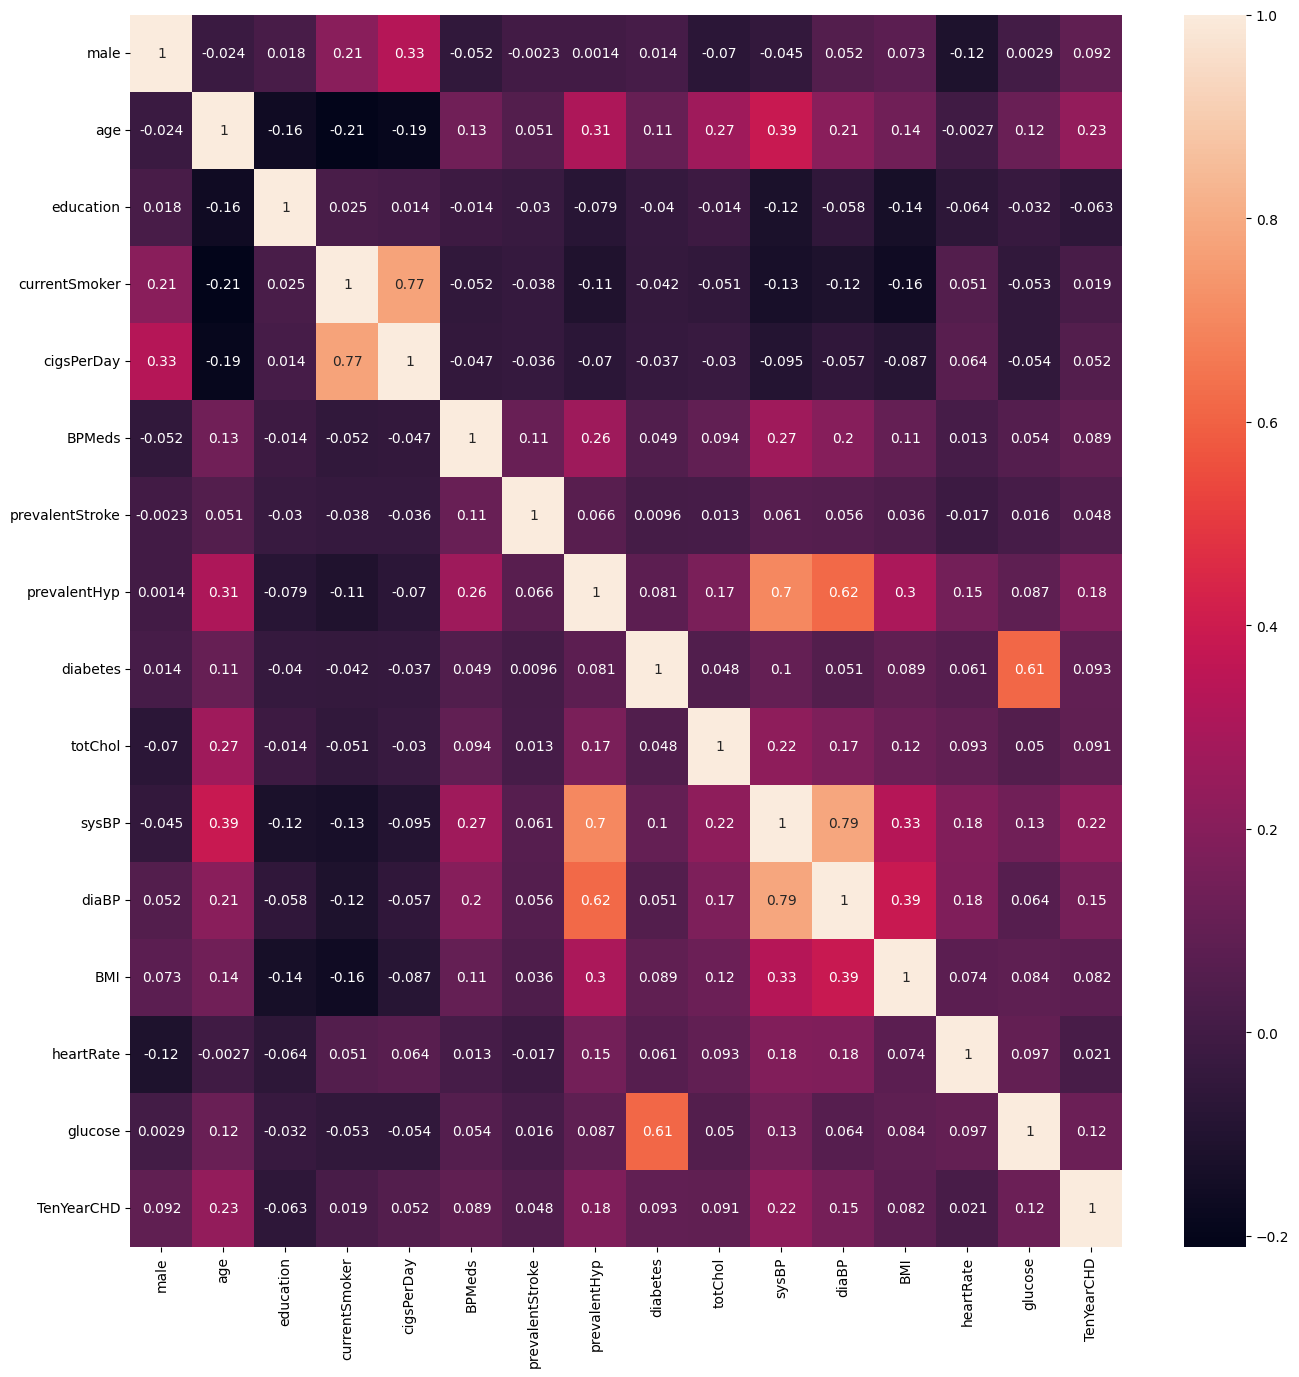

In [5]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Pairplot

In [6]:
#sns.pairplot(df.head(500))

# Countplot of people based on their sex and whether they are Current Smoker or not

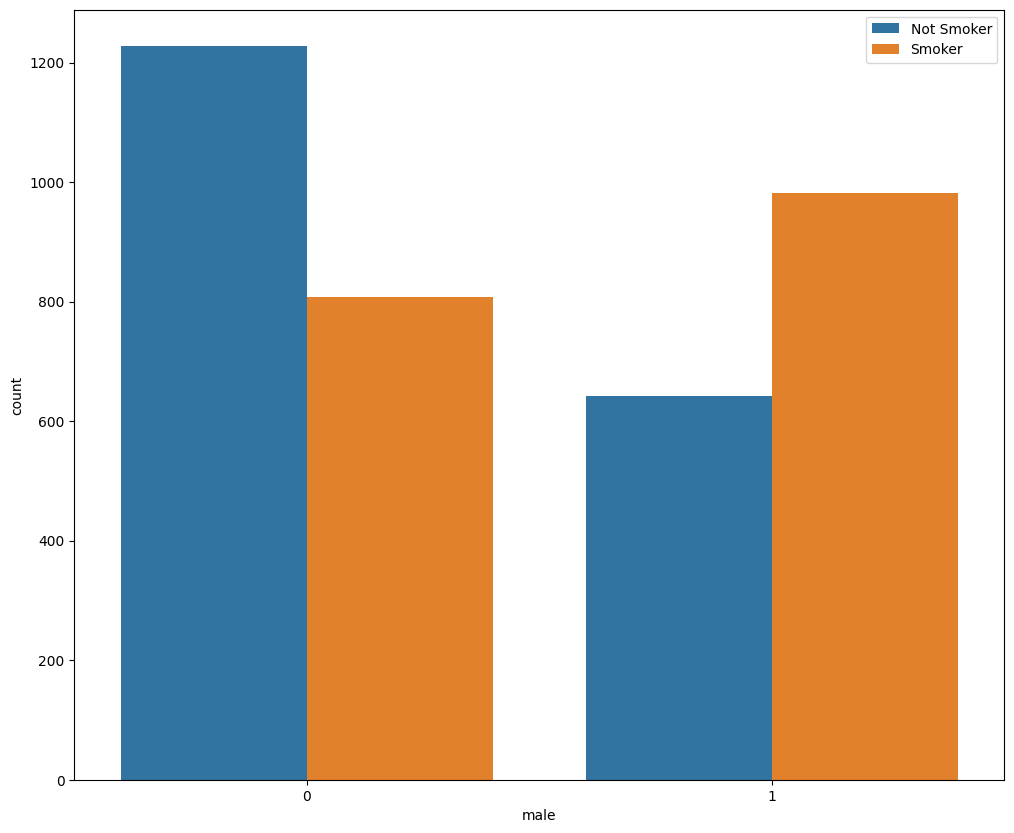

In [7]:
plt.figure(figsize=(12, 10))
sns.countplot(x="male", hue='currentSmoker', data=df)
plt.legend(['Not Smoker', 'Smoker'])
plt.show()

# Countplot - subplots of No. of people affecting with CHD on basis of their sex and current smoking.

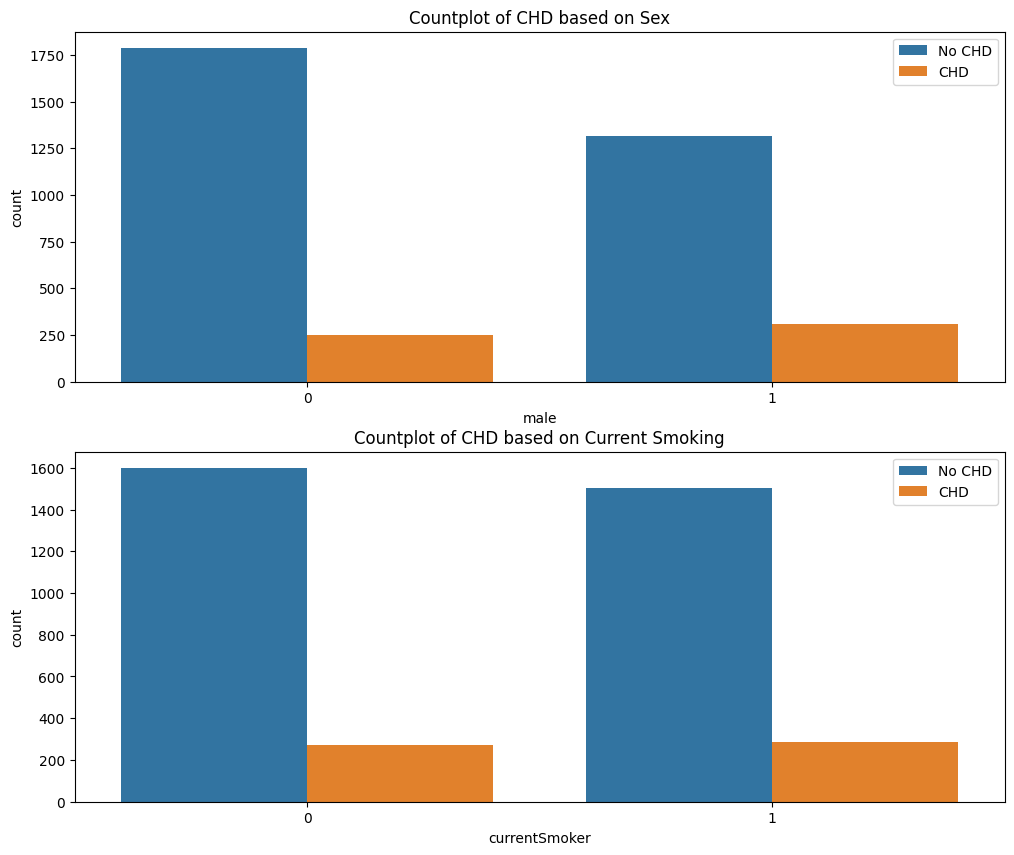

In [8]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
sns.countplot(x="male", hue='TenYearCHD', data=df)
plt.legend(['No CHD', 'CHD'])
plt.title('Countplot of CHD based on Sex')

plt.subplot(2, 1, 2)
sns.countplot(x="currentSmoker", hue='TenYearCHD', data=df)
plt.legend(['No CHD', 'CHD'])
plt.title('Countplot of CHD based on Current Smoking')

plt.show()

# Machine Learning Part

# Separating the data into feature and target data.

In [12]:
X=df.drop('TenYearCHD',axis='columns')
y=df.TenYearCHD


0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 3658, dtype: int64

# Importing the model and assigning the data for training and test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
X_train.shape

(2926, 15)

# Applying the ML model - Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Training the data

In [21]:
model.fit(X_train,y_train)

C:\Users\spars\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Testing the data

In [20]:
print("Score:",model.score(X_test, y_test))

Score: 0.8647540983606558


# Predicting the score

In [22]:
y_pred = model.predict(X_test)

# Getting the Confusion Matrix and Classification Report

# Confusion Matrix

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
confMat= confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n", confMat)
print(classification_report(y_test, y_pred))

Confusion matrix: 
 [[628   0]
 [ 99   5]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       628
           1       1.00      0.05      0.09       104

    accuracy                           0.86       732
   macro avg       0.93      0.52      0.51       732
weighted avg       0.88      0.86      0.81       732



# Plotting the confusion matrix

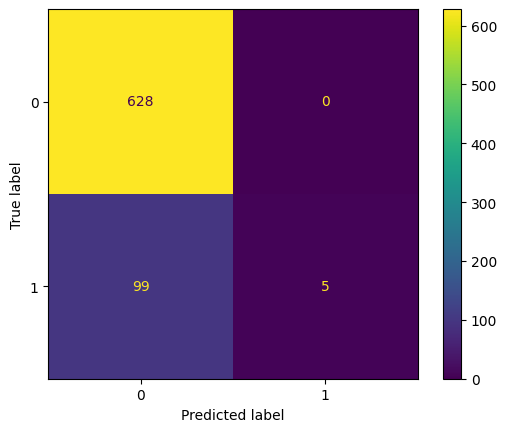

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confMat, display_labels=model.classes_)
disp.plot()